<a href="https://colab.research.google.com/github/joooseb/Proyecto-Minero/blob/main/Curva_Tonelaje_Ley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.float_format', lambda x: "%.3f" % x)
%matplotlib inline

In [2]:
g3 = pd.read_csv('/content/drive/MyDrive/Curva Tonelaje Ley/prm3.csv')
g5 = pd.read_csv('/content/drive/MyDrive/Curva Tonelaje Ley/ProyectoBBB.csv')

In [3]:
g3

,centroid_x,centroid_y,centroid_z,dim_x,dim_y,dim_z,volume,cu,veta,mine,au,densidad,tonelaje,ton_cu,ton_au,ley_aueqv,ley_cueqv,ton_cueqv,ton_aueqv,tonpr1,tonpr2,Tonelaje3,Tonelaje4
0,78361.000,4695.000,-273.000,5.000,5.000,5.000,125.000,0.409,3.000,100.000,0.363,2.540,2.540,1.038,0.923,1.433,0.548,1.391,3.639,0.760,1.961,1.074,2.810
1,78381.000,4700.000,-273.000,5.000,5.000,5.000,125.000,0.409,3.000,100.000,0.364,2.540,2.540,1.039,0.924,1.434,0.548,1.392,3.642,0.761,1.963,1.076,2.814
2,78211.000,4655.000,-263.000,5.000,5.000,5.000,125.000,0.365,3.000,100.000,0.358,2.540,2.540,0.928,0.910,1.315,0.503,1.276,3.339,0.666,1.839,0.924,2.417
3,78216.000,4655.000,-263.000,5.000,5.000,5.000,125.000,0.364,3.000,100.000,0.357,2.540,15.240,5.554,5.447,1.311,0.501,7.636,19.975,3.970,11.000,5.512,14.418
4,78216.000,4660.000,-263.000,5.000,5.000,5.000,125.000,0.366,3.000,100.000,0.359,2.540,10.160,3.723,3.651,1.318,0.504,5.118,13.389,2.676,7.373,3.714,9.716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29736,78106.000,4680.000,182.000,5.000,5.000,5.000,125.000,0.821,2.000,100.000,0.743,2.540,2.540,2.086,1.888,2.891,1.105,2.807,7.343,3.115,3.973,4.391,11.486
29737,78116.000,4680.000,182.000,5.000,5.000,5.000,125.000,0.808,2.000,100.000,0.729,2.540,2.540,2.052,1.853,2.843,1.087,2.760,7.221,3.009,3.905,4.243,11.101
29738,78121.000,4680.000,182.000,5.000,5.000,5.000,125.000,0.799,2.000,100.000,0.720,2.540,5.080,4.058,3.657,2.810,1.074,5.456,14.273,5.874,7.715,8.287,21.677
29739,78321.000,4780.000,182.000,5.000,5.000,5.000,125.000,1.025,2.000,100.000,0.799,2.540,2.540,2.604,2.030,3.481,1.331,3.380,8.841,4.291,4.633,6.165,16.127


In [4]:
g3['ley_cueqv'].describe()

count   29741.000
mean        1.145
std         0.711
min         0.019
25%         0.593
50%         1.103
75%         1.560
max         4.178
Name: ley_cueqv, dtype: float64

In [5]:
dim_x = 5
dim_y = 5
dim_z = 5

In [6]:
lim_g3 = pd.DataFrame({'Li': np.arange(0, 1.1, 0.1)})

In [7]:
lim_g3

,Li
0,0.000
1,0.100
2,0.200
3,0.300
4,0.400
5,0.500
6,0.600
7,0.700
8,0.800
9,0.900


In [8]:
lim_g3['Ls'] = lim_g3['Li'] + 0.1

In [9]:
lim_g3.iloc[-1, 1] = np.nan

In [10]:
lim_g3

,Li,Ls
0,0.000,0.100
1,0.100,0.200
2,0.200,0.300
3,0.300,0.400
4,0.400,0.500
5,0.500,0.600
6,0.600,0.700
7,0.700,0.800
8,0.800,0.900
9,0.900,1.000


In [11]:
mc = lim_g3.loc[:, "Li":"Ls"]
lim_g3['Mc'] = mc.mean(axis=1)

In [12]:
lim_g3

,Li,Ls,Mc
0,0.000,0.100,0.050
1,0.100,0.200,0.150
2,0.200,0.300,0.250
3,0.300,0.400,0.350
4,0.400,0.500,0.450
5,0.500,0.600,0.550
6,0.600,0.700,0.650
7,0.700,0.800,0.750
8,0.800,0.900,0.850
9,0.900,1.000,0.950


In [13]:
for i,li  in enumerate(lim_g3['Li']):
  print(g3.loc[g3["ley_cueqv"] > li, "ton_cueqv"].sum())

6584693.487645289
6565299.557148837
6545488.645882893
6514372.719189554
6459618.212108775
6384582.211294435
6182769.894008401
5976980.338784682
5791309.104427064
5559875.07338001
5356645.269340719


In [14]:
tonelaje = []
for i,li  in enumerate(lim_g3['Li']):
  tonelaje.append(g3.loc[g3["ley_cueqv"] > li, "ton_cueqv"].sum())
lim_g3["Tonelaje"] = tonelaje

In [15]:
lim_g3

,Li,Ls,Mc,Tonelaje
0,0.000,0.100,0.050,6584693.488
1,0.100,0.200,0.150,6565299.557
2,0.200,0.300,0.250,6545488.646
3,0.300,0.400,0.350,6514372.719
4,0.400,0.500,0.450,6459618.212
5,0.500,0.600,0.550,6384582.211
6,0.600,0.700,0.650,6182769.894
7,0.700,0.800,0.750,5976980.339
8,0.800,0.900,0.850,5791309.104
9,0.900,1.000,0.950,5559875.073


In [16]:
lim_g3["Tonelaje Mg"] = (- lim_g3["Tonelaje"].diff(periods=1).dropna().reset_index(drop=True))

In [17]:
lim_g3

,Li,Ls,Mc,Tonelaje,Tonelaje Mg
0,0.000,0.100,0.050,6584693.488,19393.930
1,0.100,0.200,0.150,6565299.557,19810.911
2,0.200,0.300,0.250,6545488.646,31115.927
3,0.300,0.400,0.350,6514372.719,54754.507
4,0.400,0.500,0.450,6459618.212,75036.001
5,0.500,0.600,0.550,6384582.211,201812.317
6,0.600,0.700,0.650,6182769.894,205789.555
7,0.700,0.800,0.750,5976980.339,185671.234
8,0.800,0.900,0.850,5791309.104,231434.031
9,0.900,1.000,0.950,5559875.073,203229.804


In [18]:
lim_g3["Tonelaje Mg"].fillna(lim_g3.iloc[-1, 3], inplace=True)

In [19]:
lim_g3

,Li,Ls,Mc,Tonelaje,Tonelaje Mg
0,0.000,0.100,0.050,6584693.488,19393.930
1,0.100,0.200,0.150,6565299.557,19810.911
2,0.200,0.300,0.250,6545488.646,31115.927
3,0.300,0.400,0.350,6514372.719,54754.507
4,0.400,0.500,0.450,6459618.212,75036.001
5,0.500,0.600,0.550,6384582.211,201812.317
6,0.600,0.700,0.650,6182769.894,205789.555
7,0.700,0.800,0.750,5976980.339,185671.234
8,0.800,0.900,0.850,5791309.104,231434.031
9,0.900,1.000,0.950,5559875.073,203229.804


In [20]:
ley_media = []
for i in range(lim_g3.shape[0]):
  value = ((lim_g3.loc[i:,"Mc"] * lim_g3.loc[i:,"Tonelaje Mg"]).sum()) / lim_g3.loc[i:, "Tonelaje Mg"].sum()
  ley_media.append(value)

In [21]:
lim_g3["Ley Media"] = ley_media

In [22]:
lim_g3

,Li,Ls,Mc,Tonelaje,Tonelaje Mg,Ley Media
0,0.000,0.100,0.050,6584693.488,19393.930,0.941
1,0.100,0.200,0.150,6565299.557,19810.911,0.943
2,0.200,0.300,0.250,6545488.646,31115.927,0.946
3,0.300,0.400,0.350,6514372.719,54754.507,0.949
4,0.400,0.500,0.450,6459618.212,75036.001,0.954
5,0.500,0.600,0.550,6384582.211,201812.317,0.960
6,0.600,0.700,0.650,6182769.894,205789.555,0.974
7,0.700,0.800,0.750,5976980.339,185671.234,0.985
8,0.800,0.900,0.850,5791309.104,231434.031,0.992
9,0.900,1.000,0.950,5559875.073,203229.804,0.998


In [23]:
leyc = pd.DataFrame({'Ley de Corte': lim_g3["Li"]})

In [24]:
leyc

,Ley de Corte
0,0.000
1,0.100
2,0.200
3,0.300
4,0.400
5,0.500
6,0.600
7,0.700
8,0.800
9,0.900


In [25]:
leyc["Tonelaje (Mt)"] = lim_g3["Tonelaje"] / (10**6)

In [26]:
leyc

,Ley de Corte,Tonelaje (Mt)
0,0.000,6.585
1,0.100,6.565
2,0.200,6.545
3,0.300,6.514
4,0.400,6.460
5,0.500,6.385
6,0.600,6.183
7,0.700,5.977
8,0.800,5.791
9,0.900,5.560


In [27]:
leyc["Ley Media (%)"] = lim_g3["Ley Media"]

In [28]:
leyc

,Ley de Corte,Tonelaje (Mt),Ley Media (%)
0,0.000,6.585,0.941
1,0.100,6.565,0.943
2,0.200,6.545,0.946
3,0.300,6.514,0.949
4,0.400,6.460,0.954
5,0.500,6.385,0.960
6,0.600,6.183,0.974
7,0.700,5.977,0.985
8,0.800,5.791,0.992
9,0.900,5.560,0.998


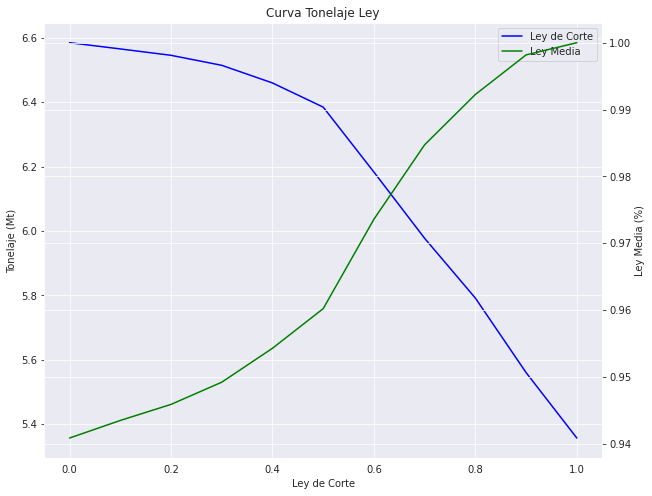

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))
twin1 = ax.twinx()
p1, = ax.plot(leyc["Ley de Corte"], leyc["Tonelaje (Mt)"], color="blue", label="Ley de Corte")
p2, = twin1.plot(leyc["Ley de Corte"], leyc["Ley Media (%)"], color="green", label="Ley Media")

ax.set_title("Curva Tonelaje Ley")
ax.set_xlabel("Ley de Corte")
ax.set_ylabel("Tonelaje (Mt)")

twin1.set_ylabel("Ley Media (%)")

ax.legend(handles=[p1, p2])
plt.show()